# Faktor Apakah yang Menjual Sebuah Mobil?

Anda adalah seorang analis di Crankshaft List. Ratusan iklan kendaraan gratis ditayangkan di situs web Anda setiap hari. Anda perlu mempelajari kumpulan data selama beberapa tahun terakhir dan menentukan faktor-faktor yang memengaruhi harga sebuah kendaraan.

Tujuan dari Proyek ini adalah 
1. untuk mencari tahu nilai jual sebuah Mobil dari beberapa faktor internal ataupun eksternal sebuah mobil
2. mencari tahu berapa lama kemungkinan mobil terjual dari awal iklan ditayangkan
3. mobil apa yang memiliki persentase penjualan tertinggi dan kisaran harganya.

## Pra-pemrosesan

Library yang di butuhkan

In [3]:
# Muat semua library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



### Memuat Data

[Muat data proyek ini dan baca informasi umumnya.]

Data Vehicles as df

In [4]:
# Muat file data menjadi DataFrame
try:
  df = pd.read_csv('/datasets/vehicles_us.csv')
except:
  df = pd.read_csv('/content/vehicles_us.csv')

### Mengeksplorasi Data Awal

*Dataset* Anda berisi kolom-kolom berikut: 


- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, disel, dan lain-lain.
- `odometer` — jarak tempuh kendaraan saat iklan ditayangkan  
- `transmission`
- `paint_color`
- `is_4wd` — apakah kendaraan memiliki penggerak 4 roda (tipe Boolean)
- `date_posted` — tanggal iklan ditayangkan 
- `days_listed` — jumlah hari iklan ditayangkan hingga dihapus 
[Pahami kolom-kolomnya, lakukan eksplorasi data agar Anda terbiasa dengan data tersebut.]

In [5]:
# tampilkan informasi/rangkuman umum tentang DataFrame
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


(51525, 13)

In [6]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [7]:
# tampilkan sampel data
df.sample(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
29152,19700,2017.0,chevrolet camaro lt coupe 2d,good,6.0,gas,NaN,other,coupe,NaN,NaN,2018-11-30,19
11073,2695,1998.0,toyota camry le,good,4.0,gas,187123.0,other,sedan,red,NaN,2018-05-07,7
35298,6000,1985.0,chevrolet corvette,good,8.0,gas,96500.0,manual,coupe,white,NaN,2019-04-07,57
16068,29900,2018.0,ford mustang gt coupe 2d,good,8.0,gas,3827.0,automatic,coupe,yellow,NaN,2018-10-15,58
12057,1999,2005.0,jeep grand cherokee laredo,excellent,6.0,gas,170.0,automatic,SUV,grey,1.0,2018-10-21,56


Dalam data ada beberapa kolom yang memiliki nilai yang hilang dan memiliki type yang kurang tepat.

contoh : date posted yang seharusnya bertipe date. dan is_4wd menjadi boolean


In [8]:
#melihat nilai unique pada kolom is_4wd
df['is_4wd'].unique()

array([ 1., nan])

In [9]:
#melihat data duplikat
df.duplicated().sum()

0

Tidak ada data duplikat di dalam data

In [10]:
#Cek nilai yang hilang di setiap kolom
df_isna = df.isna().sum().sort_values(ascending=False).reset_index()
df_isna.columns = ['kolom','jumlah nilai hilang']
df_isna['percent'] = df_isna['jumlah nilai hilang'] * 100 / len(df['is_4wd'])
df_isna

,kolom,jumlah nilai hilang,percent
0,is_4wd,25953,50.369723
1,paint_color,9267,17.985444
2,odometer,7892,15.316836
3,cylinders,5260,10.208637
4,model_year,3619,7.023775
5,price,0,0.000000
6,model,0,0.000000
7,condition,0,0.000000
8,fuel,0,0.000000
9,transmission,0,0.000000


Dari data di atas didapat nilai yang hilang pada kolom :
1. Is_4wd sebanyak 25953 atau 50% data
2. Paint_color sebanyak 9267 atau 17% data
3. odometer sebanyak 7892 atau 15% data
4. cylinders sebanyak 5260 atau 10% data
5. model_year sebanyak 3619 atau 7% data

###### Kesimpulan dan Langkah-Langkah Selanjutnya

Kesimpulan nya kita memerlukan pengecekan lebih detail terhadap data yang memiliki nilai yang hilang .setelah itu baru bisa mengisi nilai yang hilang atau menghapus nya.
dimana kebanyakan nilai yang hilang terdapat di kolom Is_4wd dengan 50% data.

## Mengatasi Nilai-Nilai yang Hilang (Jika Ada)

Melihat lebih dalam setiap kolom yang memiliki nilai yang hilang.
1. Kolom Model Year
2. Kolom Cylinders
3. Kolom Odometer
4. Kolom Pain Color
5. kolom is_4wd

In [11]:
#merubah type data is_4wd menjadi tipe boolean dan merubah nilai yang hilai menjadi False
df['is_4wd'] = df['is_4wd'] >= 1
#cek perubahan
df['is_4wd'].isna().sum()

0

In [12]:
#melihat nilai unique dari kolom model_year
df['model_year'].unique()

array([2011.,   nan, 2013., 2003., 2017., 2014., 2015., 2012., 2008.,
       2018., 2009., 2010., 2007., 2004., 2005., 2001., 2006., 1966.,
       1994., 2019., 2000., 2016., 1993., 1999., 1997., 2002., 1981.,
       1995., 1996., 1975., 1998., 1985., 1977., 1987., 1974., 1990.,
       1992., 1991., 1972., 1967., 1988., 1969., 1989., 1978., 1965.,
       1979., 1968., 1986., 1980., 1964., 1963., 1984., 1982., 1973.,
       1970., 1955., 1971., 1976., 1983., 1954., 1962., 1948., 1960.,
       1908., 1961., 1936., 1949., 1958., 1929.])

In [13]:
#melihat distribusi model_year terhadap model
df.groupby(['model','model_year'])['model_year'].count()

model              model_year
acura tl           1999.0         3
                   2001.0         6
                   2002.0         2
                   2003.0        10
                   2004.0        16
                                 ..
volkswagen passat  2014.0        44
                   2015.0        26
                   2016.0        10
                   2017.0        10
                   2018.0         1
Name: model_year, Length: 2226, dtype: int64

Pada kolom model dikarenakn distribusi nya yang beragam, nilai yang hilang akan kita isi tahun denga modus terbanyak terhadap model.
dan kita akan membuat sebuah fungsi untuk mengisi itu.

In [14]:
#Fungsi memasukan nilai yang hilang pada kolom model year dengan modus terhadap model
def fill_missing (data, column, value_column):
    grouped_values = data.groupby(column)[value_column].agg(lambda x: pd.Series.mode(x)[0]).reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[column][i]
        value = grouped_values[value_column][i]
        data.loc[(data[column]==group) & (data[value_column].isna()),value_column] = value
    return data


In [15]:
#jalankan fungsi 
df = fill_missing (df,'model','model_year')

In [16]:
#cek kembali nilai unique kolom model_year
df['model_year'].unique()

array([2011., 2013., 2003., 2017., 2014., 2015., 2012., 2008., 2018.,
       2009., 2010., 2007., 2004., 2005., 2001., 2006., 1966., 1994.,
       2019., 2000., 2016., 1993., 1999., 1997., 2002., 1981., 1995.,
       1996., 1975., 1998., 1985., 1977., 1987., 1974., 1990., 1992.,
       1991., 1972., 1967., 1988., 1969., 1989., 1978., 1965., 1979.,
       1968., 1986., 1980., 1964., 1963., 1984., 1982., 1973., 1970.,
       1955., 1971., 1976., 1983., 1954., 1962., 1948., 1960., 1908.,
       1961., 1936., 1949., 1958., 1929.])

In [17]:
#melihat nilai unique pada kolom cylinder
df['cylinders'].unique()

array([ 6.,  4.,  8., nan,  5., 10.,  3., 12.])

In [18]:
#melihat distribusi cylinder terhadap model
df.groupby(['model','cylinders'])['cylinders'].count()

model              cylinders
acura tl           4.0            3
                   6.0          208
bmw x5             6.0          200
                   8.0           51
buick enclave      4.0            1
                               ... 
volkswagen jetta   5.0          123
                   6.0            4
volkswagen passat  4.0          243
                   5.0           43
                   6.0           30
Name: cylinders, Length: 307, dtype: int64

Pada kolom cylinders dikarenakan distribusi nya yang beragam akan kita isi nilai yang hilang pada cylinders dengan modus terbanyak terhadap model.

In [19]:
#Menjalankan fungsi fill missing terhadap cylinders
df = fill_missing (df,'model','cylinders')

In [20]:
#cek kembali nilai unique nya
df['cylinders'].unique()

array([ 6.,  4.,  8.,  5., 10.,  3., 12.])

In [21]:
#melihat nilai unique paint color
df['paint_color'].unique()

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

In [22]:
#melihat distribusi paint color terhadap model
df.groupby(['model','paint_color'])['paint_color'].count()

model              paint_color
acura tl           black          44
                   blue            9
                   brown           2
                   custom          2
                   green           7
                                  ..
volkswagen passat  green           5
                   grey           38
                   red            17
                   silver         60
                   white          46
Name: paint_color, Length: 1019, dtype: int64

untuk nilai yang hilang pada color, akan kita isi dengan 'others'

In [23]:
#mengisi nilai yang hilang pada color dengan others
df['paint_color'] = df['paint_color'].fillna('others')

In [24]:
#cek kembali nilai unique
df['paint_color'].unique()

array(['others', 'white', 'red', 'black', 'blue', 'grey', 'silver',
       'custom', 'orange', 'yellow', 'brown', 'green', 'purple'],
      dtype=object)

In [25]:
#cek nilai unique odometer
df['odometer'].unique()

array([145000.,  88705., 110000., ..., 121778., 181500., 139573.])

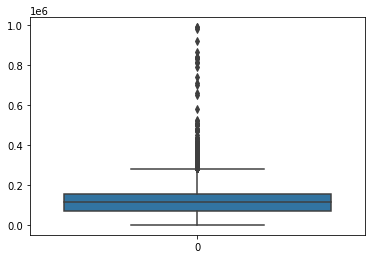

In [26]:
#Cek grafik Boxplot odometer
sns.boxplot(data=df['odometer'])
plt.show()

dari data di atas banyak sekali nilai outlier, yang mengharuskan kita mengisi nilai yang hilang dengan median.

In [27]:
#cek info dari kolom odometer
df['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

In [28]:
#mengisi nilai yang hilang dengan nilai median
df.loc[df['odometer'].isna(), 'odometer'] = df['odometer'].median()

Kesimpulan.
setelah dilihat lebih dalam dan dianalisa, kolom yang memiliki nilai yang hilang di isi dengan beberapa metode sebagai berikut
1. Kolom Model Year = di isi dengan nilai terbanyak(modus) terhadap model mobil dikarenakan distribusi nya yang beragam
2. Kolom Cylinders = di isi dengan nilai terbanyak(modus) terhadap model mobil dikarenakan distribusi nya yang beragam
3. Kolom Odometer = di isi dengan nilai tengah(median) dikarenakan banyak nya outlier
4. Kolom Pain Color = di isi dengan Others untuk nilai yang hilang
5. kolom is_4wd = di isi dengan nilai False(boolean) dikarenakan hanya ada 2 kategori, 1/True = 4wd, 0/False = non 4wd


## Memperbaiki Tipe Data


Memperbaiki semua tipe data yang di perlukan :
1. Date_posted menjadi datetime
2. Model_year menjadi integer
3. Cylinders menjadi integer
4. Odometer menjadi integer

In [29]:
#merubah type data date_posted
df['date_posted'] = pd.to_datetime(df['date_posted'], format= '%Y-%m-%d')


In [30]:
#merubah type data model_year
df['model_year'] = df['model_year'].astype(int)

In [31]:
#merubah type data Cylinders
df['cylinders'] = df['cylinders'].astype(int)

In [32]:
#merubah type data Odometer
df['odometer'] = df['odometer'].astype(int)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(5), object(6)
memory usage: 4.8+ MB


## Memperbaiki Kualitas Data

Menambahkan kolom waktu secara terpisah antara hari, bulan dan tahun

In [34]:
# Tambahkan nilai waktu dan tanggal pada saat iklan ditayangkan 
df['date_weekday'] = df['date_posted'].dt.weekday
df['date_month'] = df['date_posted'].dt.month
df['date_year'] = df['date_posted'].dt.year
df.sample()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_weekday,date_month,date_year
20827,8000,1996,ford f350,good,8,diesel,130000,automatic,truck,blue,False,2019-02-14,10,3,2,2019


In [35]:
# Tambahkan usia kendaraan saat iklan ditayangkan
df['age_car'] = (df['date_year'] - df['model_year'])

In [36]:
#mengisi nilai 0 pada age car menjadi 1,
df.loc[df['age_car'] == 0,'age_car'] = 1

In [37]:
df[df['age_car'] == 0]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_weekday,date_month,date_year,age_car


In [38]:
# Tambahkan jarak tempuh rata-rata kendaraan per tahun 
df['avg_odo_year'] = round(df['odometer'] / df['age_car'], 0).astype(int)

In [39]:
# Mungkin membantu untuk mengganti nilai pada kolom 'condition' dengan sesuatu yang dapat dimanipulasi dengan lebih mudah 
def rate_condition(row):
    condition = row['condition']
    if condition == 'new':
        return 5
    elif condition == 'like new':
        return 4
    elif condition == 'fair':
        return 1
    elif condition == 'excellent':
        return 3
    elif condition == 'good':
        return 2
    elif condition == 'salvage':
        return 0
    return 'N/A'
df['rate_condition'] = df.apply(rate_condition, axis=1)
df.sample()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_weekday,date_month,date_year,age_car,avg_odo_year,rate_condition
41517,29990,2016,chevrolet suburban,like new,8,gas,122987,automatic,SUV,silver,True,2018-07-11,27,2,7,2018,2,61494,4


## Memeriksa Data yang Sudah Bersih

In [40]:
# tampilkan informasi/rangkuman umum tentang DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           51525 non-null  int64         
 1   model_year      51525 non-null  int64         
 2   model           51525 non-null  object        
 3   condition       51525 non-null  object        
 4   cylinders       51525 non-null  int64         
 5   fuel            51525 non-null  object        
 6   odometer        51525 non-null  int64         
 7   transmission    51525 non-null  object        
 8   type            51525 non-null  object        
 9   paint_color     51525 non-null  object        
 10  is_4wd          51525 non-null  bool          
 11  date_posted     51525 non-null  datetime64[ns]
 12  days_listed     51525 non-null  int64         
 13  date_weekday    51525 non-null  int64         
 14  date_month      51525 non-null  int64         
 15  da

In [41]:
# tampilkan sampel data 
df.sample(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_weekday,date_month,date_year,age_car,avg_odo_year,rate_condition
25484,6950,2008,chevrolet tahoe,good,8,gas,200000,automatic,SUV,black,False,2018-05-21,46,0,5,2018,10,20000,2
48331,35000,2016,gmc sierra,excellent,8,gas,39500,automatic,truck,black,True,2018-08-05,100,6,8,2018,2,19750,3
36046,39999,2017,ram 2500,good,6,diesel,51148,automatic,truck,others,True,2019-01-06,59,6,1,2019,2,25574,2
4255,24000,2015,ram 1500,excellent,8,gas,111000,automatic,truck,grey,True,2019-04-18,63,3,4,2019,4,27750,3
45834,22995,2010,jeep wrangler,like new,6,gas,113000,automatic,SUV,others,True,2019-01-17,15,3,1,2019,9,12556,4


## Mempelajari Parameter Inti 
[Pilih pendekatan yang tepat untuk mempelajari parameter yang tercantum di bawah ini, berikan perhatian khusus bagaimana *outlier* memengaruhi bentuk dan kemudahan pembacaan histogram.]

- Parameternya adalah 
- Harga
- Usia kendaraan ketika iklan ditayangkan
- Jarak tempuh
- Jumlah silinder 
- Kondisi

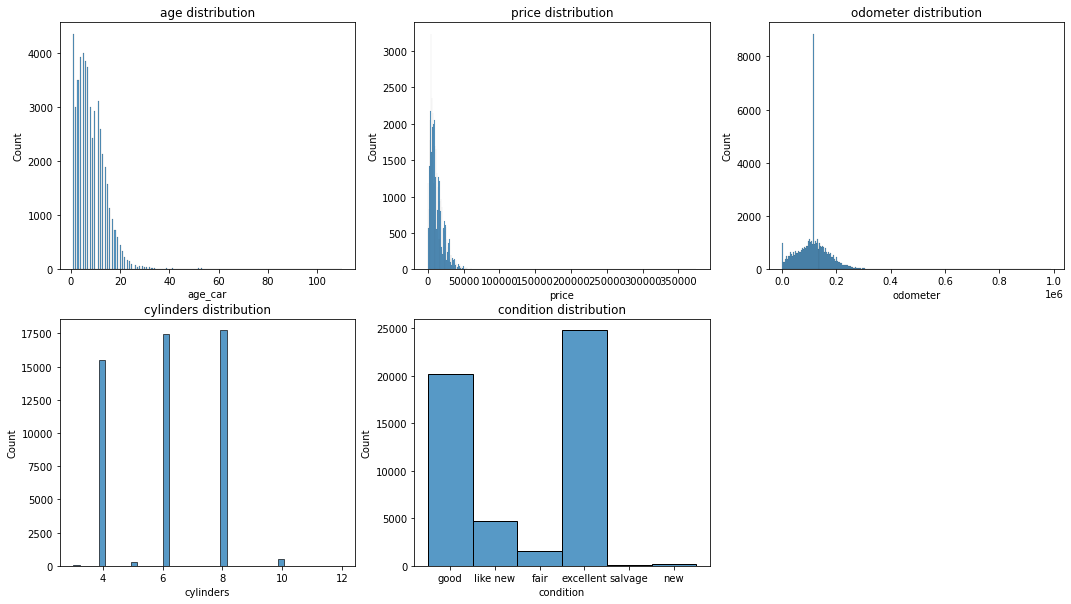

In [42]:
#Fungsi membuat grafik distribusi
plt.figure(figsize=(18,10),frameon=True)
def grafik_distribution(data,title,no):
    plt.subplot(2, 3, no)
    plt.title(title)
    sns.histplot(data)
    
grafik_distribution(df['age_car'],'age distribution',1)
grafik_distribution(df['price'],'price distribution',2)
grafik_distribution(df['odometer'],'odometer distribution',3)
grafik_distribution(df['cylinders'],'cylinders distribution',4)
grafik_distribution(df['condition'],'condition distribution',5)

plt.show()

## Mempelajari dan Menangani Outlier

Membuat data baru tanpa sebuah outlier 

In [43]:
# Tentukan batas atas outlier 
#Fungsi Batas atas sebuah Outlier
def batas_atas(data_column):
    Q1 = data_column.quantile(0.25)
    Q3 = data_column.quantile(0.75)
    IQR = Q3 - Q1
    batas_atas = Q3 + (1.5 * IQR)
    return batas_atas
#Fungsi Batas bawah sebuah Outlier
def batas_bawah(data_column):
    Q1 = data_column.quantile(0.25)
    Q3 = data_column.quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - (1.5 * IQR)
    return batas_bawah

In [44]:
print('Batas bawah dan atas kolom Age_car =',batas_bawah(df['age_car']),'&',batas_atas(df['age_car']))
print('Batas bawah dan atas kolom price =',batas_bawah(df['price']),'&',batas_atas(df['price']))
print('Batas bawah dan atas kolom odometer =',batas_bawah(df['odometer']),'&',batas_atas(df['odometer']))

Batas bawah dan atas kolom Age_car = -8.0 & 24.0
Batas bawah dan atas kolom price = -12758.5 & 34597.5
Batas bawah dan atas kolom odometer = -21859.0 & 247581.0


In [45]:
# Simpan data tanpa outlier dalam DataFrame yang terpisah
# batas atas dan bawah outlier age_car
df_filter = df[(df['age_car'] >= batas_bawah(df['age_car']))&(df['age_car'] <= batas_atas(df['age_car']))]
# batas atas dan bawah outlier price
df_filter = df_filter[(df_filter['price'] >= batas_bawah(df_filter['price']))&(df_filter['price'] <= batas_atas(df_filter['price']))]
# batas atas dan bawah outlier odometer
df_filter = df_filter[(df_filter['odometer'] >=batas_bawah(df_filter['odometer']))&(df_filter['odometer'] <= batas_atas(df_filter['odometer']))]


## Mempelajari Parameter Inti Tanpa Outlier

Membuat grafik baru dari data yang sudah di filter dan membandingkan nya

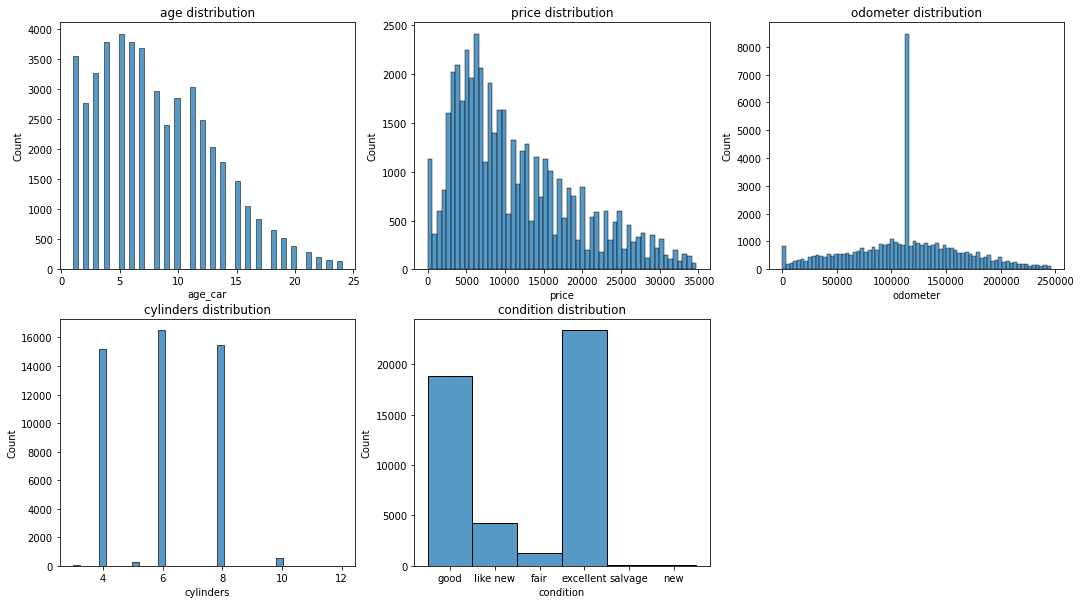

In [46]:
plt.figure(figsize=(18, 10),frameon=True)
grafik_distribution(df_filter['age_car'],'age distribution',1)
grafik_distribution(df_filter['price'],'price distribution',2)
grafik_distribution(df_filter['odometer'],'odometer distribution',3)
grafik_distribution(df_filter['cylinders'],'cylinders distribution',4)
grafik_distribution(df_filter['condition'],'condition distribution',5)

plt.show()

Kesimpulan dari data yang belum di filter dan data yang sudah di filter adalah sebagai berikut:
1. Kolom Age Car : mendapat perubahan grafik yang lebih jelas bahwa data yang sudah di filter memiliki nilai terbanyak atau puncak di 5 - 7 tahun. dan mengalami penurunan setelah nya/ miring ke kanan
2. kolom Price : mendapat perubahan grafik yang lebih jelas bahwa data yang sudah di filter memiliki nilai terbanyak atau puncak di sekitar harga 4000 - 5000 dan mengalami penurunan setelah nya/ miring ke kanan
3. Kolom Odometer : mendapat perubahan grafik yang lebih jelas bahwa data yang sudah di filter memiliki nilai terbanyak atau puncak di sekitar 10000 - 13000 , dan grafik menunjukan simetri
4. Kolom Cylinders dan condition, tidak mengalami perubahan grafik secara signifikan

## Masa Berlaku Iklan 
Mengitung rata rata dan median dari berapa hari iklan ditayangkan.

mean: 40.0
median: 33.0
min: 0
max: 271


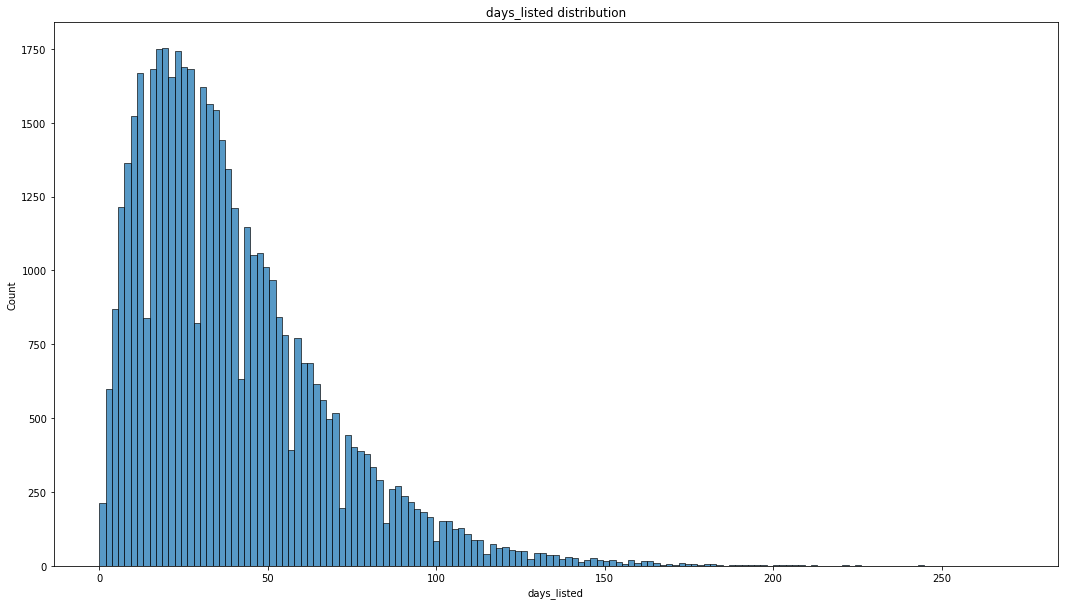

In [47]:
#Histogram Days Listed
print('mean:', round(df_filter['days_listed'].mean(), 0))
print('median:', df_filter['days_listed'].median())
print('min:', df_filter['days_listed'].min())
print('max:', df_filter['days_listed'].max())
plt.figure(figsize=(18, 10),frameon=True)
plt.title('days_listed distribution')
sns.histplot(df_filter['days_listed'])
plt.show()

Dari kesimpulan grafik Histogram days_listed adalah
- Mean dari distribusi data days listed adalah 40 hari sedangkan Mediannya adalah 33 hari.
- Distribusinya skew/miring ke kanan atau banyak mobil yang dijual di atas durasi mean nya.
- iklan tercepat adalah 0 hari dan iklan terlama adalah 271 hari

## Harga Rata-Rata Setiap Jenis Kendaraan

Menganalisa Jumlah iklan dan harga rata rata untuk setiap jenis kendaraan dan buatlah grafik yang mendukung kendaraan dengan jumlah iklan yang paling banyak.


In [48]:
#Mengelompokan jumlah ikan dan harga rata rata dari setiap jenis kendaraan
avg_group1 = df_filter.groupby(['type']).agg({
    'price' : 'mean',
    'model' : 'count'
}).rename(columns={
    'price' : 'avg_price',
    'model' : 'count_type'
}).sort_values(by = 'count_type', ascending=False).reset_index()

In [49]:
avg_group1

,type,avg_price,count_type
0,sedan,6998.785852,11959
1,SUV,10507.262748,11825
2,truck,15227.789651,10977
3,pickup,15157.668166,6223
4,coupe,13486.747535,2028
5,wagon,9041.433873,1482
6,mini-van,8084.955224,1139
7,hatchback,6851.938247,1004
8,van,8896.221837,577
9,convertible,12819.307910,354


Text(0.5, 1.0, 'averange price per type')

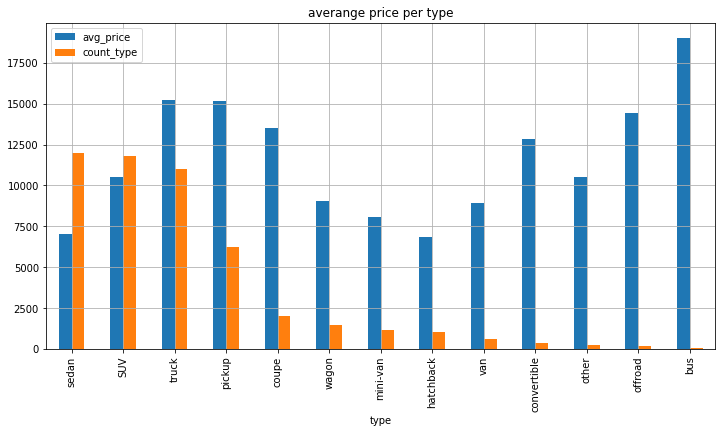

In [50]:
avg_group1.plot(kind='bar',grid=True,figsize=(12,6),x='type')
plt.title('averange price per type')

Dari Grafik di atas dapat di simpulkan bahwa :
1. Kendaraan Sedan dan SUV paling banyak di iklan kan dengan rata rata haraga di bawah 10000
2. Kendaraan Bus sedikit di iklan kan dikarenakan harga rata rata yang di atas 16000
3. 2 kendaraan populer adalah sedan dan SUV

## Faktor Harga

Faktor yang paling memengaruhi harga kendaraan.


### Tipe Sedan

In [73]:
#Sedan
df_filter_sedan = df_filter[df_filter['type'] == 'sedan']

In [74]:
df_filter_sedan.corr()['price']

price             1.000000
model_year        0.607553
cylinders        -0.043497
odometer         -0.503726
is_4wd            0.039477
days_listed       0.001081
date_weekday     -0.004704
date_month       -0.018190
date_year         0.015696
age_car          -0.601712
avg_odo_year      0.278934
rate_condition    0.289353
Name: price, dtype: float64

Text(0.5, 1.0, 'korelasi usia dengan harga mobil sedan')

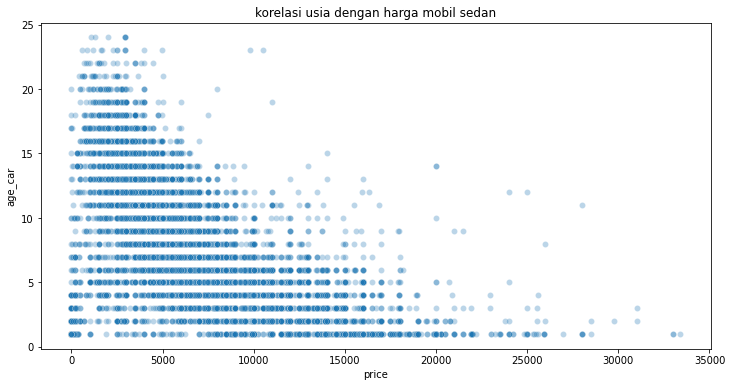

In [75]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_filter_sedan, x='price', y='age_car',alpha=0.3)
plt.title('korelasi usia dengan harga mobil sedan')

Korelasi age_car dengan price di dapat hasil -0.6, dimana semakin tua mobil harga semakin murah. 

Text(0.5, 1.0, 'korelasi jarak tempuh dengan harga mobil sedan')

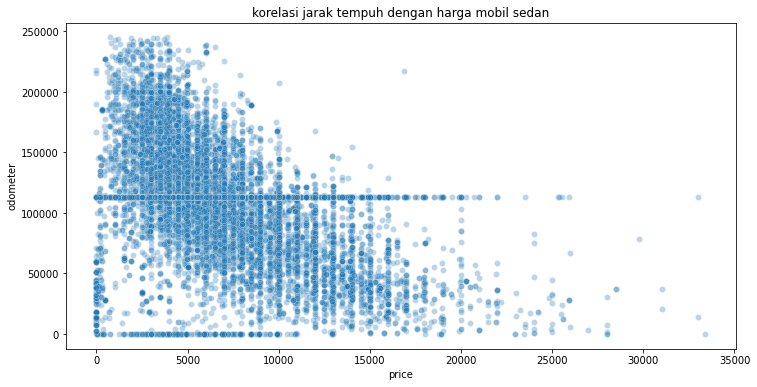

In [76]:
#korelasi jarak tempuh dengan harga
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_filter_sedan, x='price', y='odometer',alpha=0.3)
plt.title('korelasi jarak tempuh dengan harga mobil sedan')

Korelasi odometer dengan price di dapat hasil -0.50, dimana semakin tinggi jarak tempuh mobil harga akan semakin murah. 

Text(0.5, 1.0, 'korelasi rate_condition dengan harga mobil sedan')

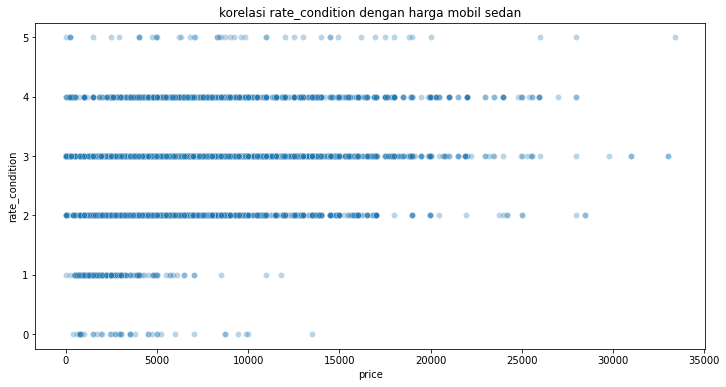

In [77]:
#korelasi rate_condition dengan harga
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_filter_sedan, x='price', y='rate_condition',alpha=0.3)
plt.title('korelasi rate_condition dengan harga mobil sedan')

Korelasi condition dengan price di dapat hasil 0.28, dimana kondisi suatu mobil sedikit kemungkinan mempengaruhi suatu harga 

In [78]:
#cek distribusi is_4wd untuk tipe sedan
df_filter_sedan['transmission'].value_counts()

automatic    11259
manual         569
other          131
Name: transmission, dtype: int64

Text(0.5, 1.0, 'korelasi transmisi dengan harga mobil Sedan')

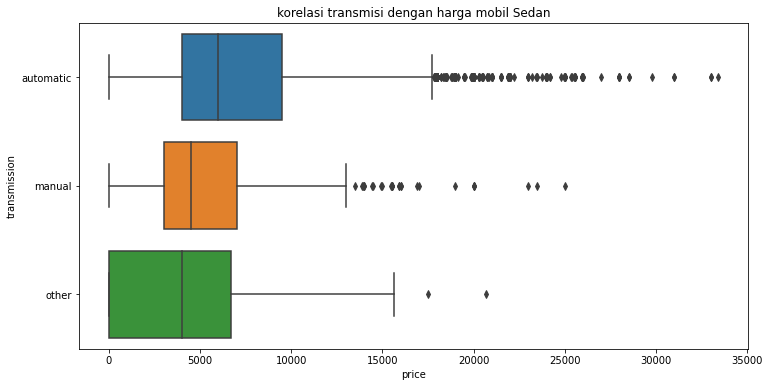

In [79]:
#korelasi transmission dengan harga
plt.figure(figsize=(12,6))
sns.boxplot(data=df_filter_sedan, x='price', y='transmission')
plt.title('korelasi transmisi dengan harga mobil Sedan')

Korelasi Transmisiion dengan price di dapat hasil dimana transmisi suatu mobil mempengaruhi harga mobil, 
contoh transmisi automatic memiliki nilai harga yang lebih tinggi di banding tipe transmisi yang lain

In [80]:
#cek distribusi color untuk tipe sedan
df_filter_sedan['paint_color'].value_counts()

others    2151
silver    2020
black     1756
grey      1604
white     1484
blue      1216
red        931
custom     296
brown      252
green      196
purple      23
yellow      21
orange       9
Name: paint_color, dtype: int64

In [81]:
 list_include_color_sedan = list(df_filter_sedan['paint_color'].value_counts()[:-3].index)

In [82]:
df_filter_sedan_color = df_filter_sedan[df_filter_sedan['paint_color'].isin(list_include_color_sedan)].reset_index(drop=True)

Text(0.5, 1.0, 'korelasi warna dengan harga')

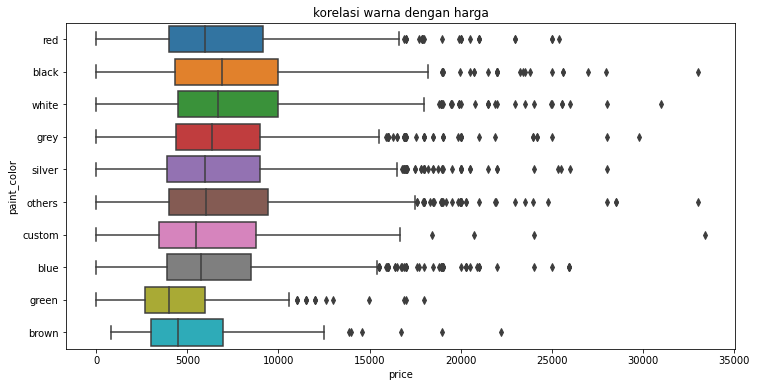

In [83]:
#korelasi warna dengan harga
plt.figure(figsize=(12,6))
sns.boxplot(data=df_filter_sedan_color, x='price', y='paint_color')
plt.title('korelasi warna dengan harga')

Korelasi warna dengan price di dapat hasil dimana warna suatu mobil tidak terlalu mempengaruhi harga mobil, 
dikarenakan sebaran warna dengan harga yang hampir sama semua di setiap warna

### Tipe SUV

In [84]:
#SUV
df_filter_suv = df_filter[df_filter['type'] == 'SUV']

In [85]:
df_filter_suv.corr()['price']

price             1.000000
model_year        0.569315
cylinders         0.006099
odometer         -0.471547
is_4wd            0.115170
days_listed      -0.019779
date_weekday      0.011254
date_month       -0.006352
date_year         0.000869
age_car          -0.568958
avg_odo_year      0.267068
rate_condition    0.256001
Name: price, dtype: float64

Text(0.5, 1.0, 'korelasi usia dengan harga mobil SUV')

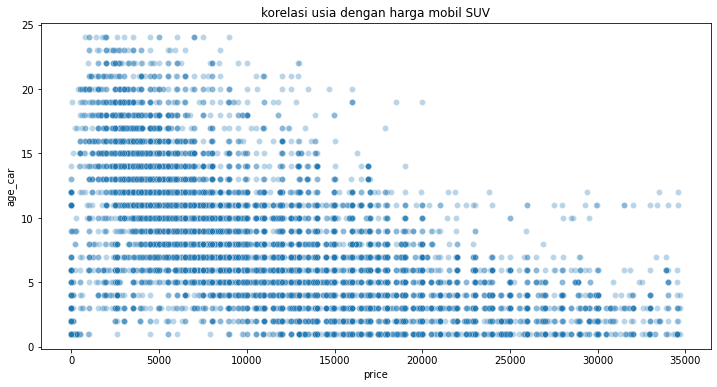

In [86]:
#korelasi usia dengan harga
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_filter_suv, x='price', y='age_car',alpha=0.3)
plt.title('korelasi usia dengan harga mobil SUV')

Korelasi age_car dengan price di dapat hasil -0.56, dimana semakin tua mobil harga semakin murah. 

Text(0.5, 1.0, 'korelasi jarak tempuh dengan harga mobil suv')

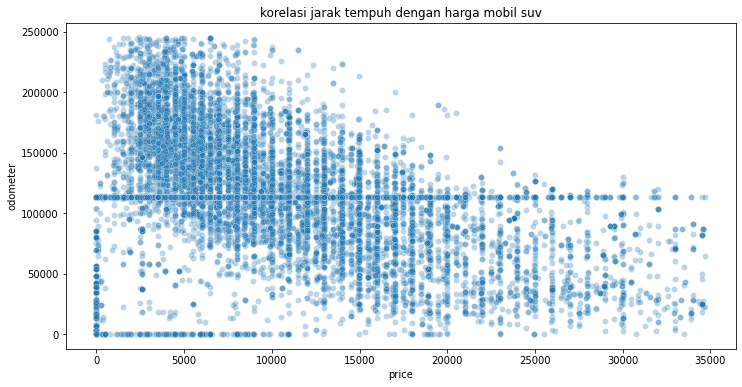

In [87]:
#korelasi jarak tempuh dengan harga
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_filter_suv, x='price', y='odometer',alpha=0.3)
plt.title('korelasi jarak tempuh dengan harga mobil suv')

Korelasi odometer dengan price di dapat hasil -0.47, dimana semakin tinggi jarak tempuh mobil harga akan semakin murah. 

Text(0.5, 1.0, 'korelasi rate_condition dengan harga mobil SUV')

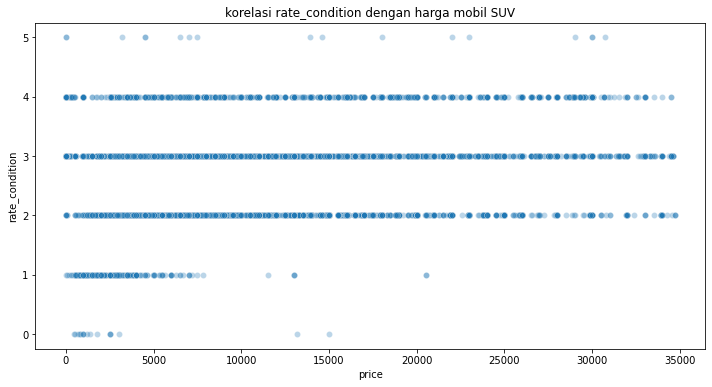

In [88]:
#korelasi rate_condition dengan harga
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_filter_suv, x='price', y='rate_condition',alpha=0.3)
plt.title('korelasi rate_condition dengan harga mobil SUV')

Korelasi condition dengan price di dapat hasil 0.25, dimana kondisi suatu mobil sedikit kemungkinan mempengaruhi suatu harga 

In [89]:
#cek distribusi is_4wd untuk tipe suv
df_filter_suv['transmission'].value_counts()

automatic    11207
manual         460
other          158
Name: transmission, dtype: int64

Text(0.5, 1.0, 'korelasi transmisi dengan harga mobil SUV')

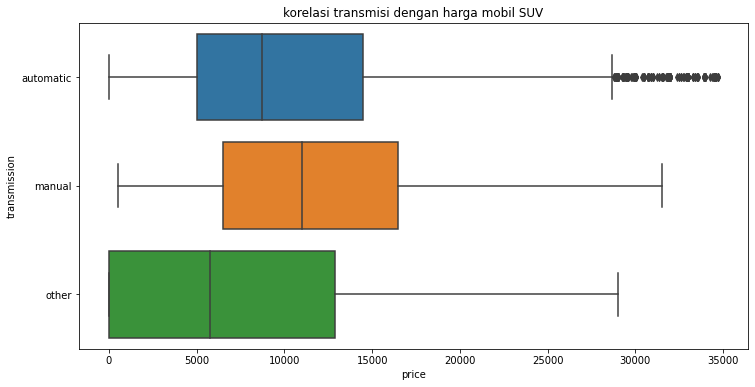

In [90]:
#korelasi transmission dengan harga
plt.figure(figsize=(12,6))
sns.boxplot(data=df_filter_suv, x='price', y='transmission')
plt.title('korelasi transmisi dengan harga mobil SUV')

Korelasi Transmisiion dengan price di dapat hasil dimana transmisi suatu mobil mempengaruhi harga mobil, 
contoh transmisi manual memiliki nilai harga rata rata yang lebih tinggi di banding tipe transmisi yang lain

In [91]:
#cek distribusi color untuk tipe suv
df_filter_suv['paint_color'].value_counts()

others    2131
black     2084
white     1854
silver    1523
grey      1142
blue      1004
red        864
green      412
brown      350
custom     298
orange      81
yellow      45
purple      37
Name: paint_color, dtype: int64

In [92]:
 list_include_color_suv = list(df_filter_suv['paint_color'].value_counts()[:-2].index)

In [93]:
df_filter_suv_color = df_filter_suv[df_filter_suv['paint_color'].isin(list_include_color_suv)].reset_index(drop=True)

Text(0.5, 1.0, 'korelasi warna dengan harga mobil SUV')

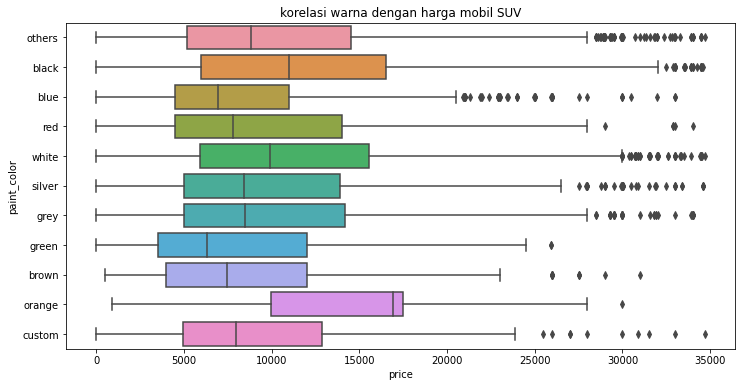

In [94]:
#korelasi warna dengan harga
plt.figure(figsize=(12,6))
sns.boxplot(data=df_filter_suv_color, x='price', y='paint_color')
plt.title('korelasi warna dengan harga mobil SUV')

Korelasi warna dengan price di dapat hasil dimana warna suatu mobil tidak terlalu mempengaruhi harga mobil, 
dikarenakan sebaran warna dengan harga yang hampir sama semua di setiap warna

Kesimpulan:
1. Nilai yang hilang pada data awal kita isi dengan beberapa ketentuan, seperti memasukan modus/nilai terbanyak terhadap model seperti pada kolom Cylinders dan model_year, kolom Paint_color di isi dengan nilai Others, kolom odometer diisi dengan nilai tengah/median , dan ada juga yang di isi dengan nilai 0 untuk kolom is_4wd dikarenakan hanya ada 2 kemungkinan 1 = 4wd, 0 = tidak 4wd dan dirubah menjadi tipe boolean.
2. beberapa kolom memiliki tipe data yang salah, jadi kita perbaiki sesuai dengan yang dibutuhkan, contoh kolom tanggal, dirubah tipenya menjadi datetime.
3. lalu di buat kolom baru tentang rata rata jarak tempuh pertahun dan membuat kolom condition menjadi numerik.
4. Membuat histogram dari data asli dan histogram dari data yang sudah di filter(menghapus nilai outlier) pada kolom Odometer, age_car, dan price yang membuat sebuah perbadaan grafik yang di tampilkan, dimana grafik dari data yang sudah di filter lebih jelas.
5. membuat histogram tentang rata rata dan median dari days_listed. yang mendapatkan kesimpulan bahwa rata rata sebuah mobil akan terjual di hari ke 40.
7. Membuat korelasi antara jumlah iklan dan harga rata rata setiap jenis kendaraan yang dimana di dapat kendaraan yang paling populer di iklan kan adalah Sedan dan disusul SUV. dikarenakan harga rata rata dibawah 12000
8. membuat korelasi dari dua mobil terpopuler dengan 5 indikator, didapat hasil berikut :
    1. Sedan = harga akan tinggi jika semakin muda usia mobil, jarak tempuh masih sedikit, kondisi like new/excellent, dan transmisi automatic. 
    2. SUV = harga akan tinggi jika semakin muda usia mobil, jarak tempuh masih sedikit, kondisi like new/excellent, dan transmisi manual.